## Geração de Gráficos de CK e Glicose
O objetivo desse notebook é criar gráficos e obter estatísticas descritivas usando os dados de CK (CPK), glicose e BMI da tabela `paired_glucose_insulin_ck_death.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Gráfico de CK por BMI
Dividindo o conjunto de dados por via de aplicação, podemos plotar um gráfico de CK (CPK) (IU/L) por BMI (kg/m2).

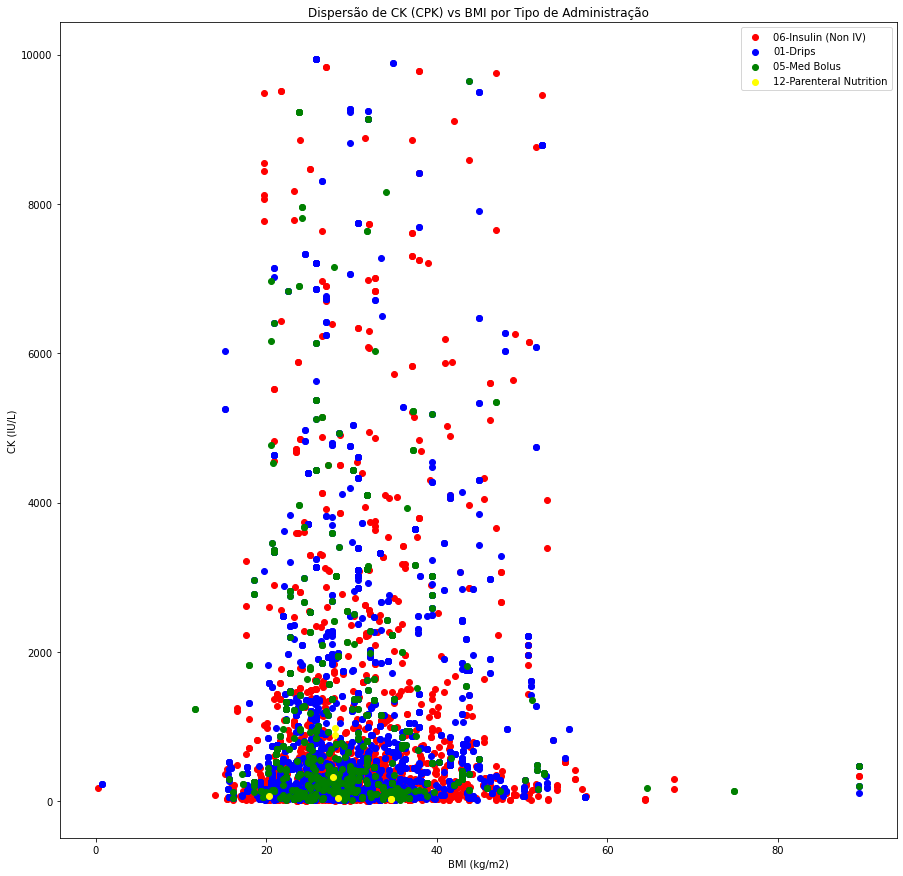

In [2]:
df = pd.read_csv('../data/interim/paired_glucose_insulin_ck_death.csv')

# Define uma cor para cada um dos 4 tipos de admnistração
ins_colors = {
    '06-Insulin (Non IV)': 'red',
    '01-Drips': 'blue',
    '05-Med Bolus' : 'green',
    '12-Parenteral Nutrition': 'yellow'
}

ins_types = df['insulin_ordercategoryname']

plt.figure(figsize=(15,15))

for ins in ins_types.unique():
    ins_data = df[ins_types == ins]
    plt.scatter(ins_data['BMI (km/m2)'], ins_data['CK (IU/L)'], 
                color=ins_colors.get(ins, 'black'), label=ins)
    
    
plt.xlabel('BMI (kg/m2)')
plt.ylabel('CK (IU/L)')
plt.title('Dispersão de CK (CPK) vs BMI por Tipo de Administração')
plt.legend()
plt.show()

#### Gráfico de glicose por BMI
Primeiramente, precisamos calcular a média das medições para cada paciente, visto que foram feitas várias diferentes tanto para glicose quanto para BMI. Em seguida, estratificamos as medições para pacientes obesos e não obesos e plotamos.

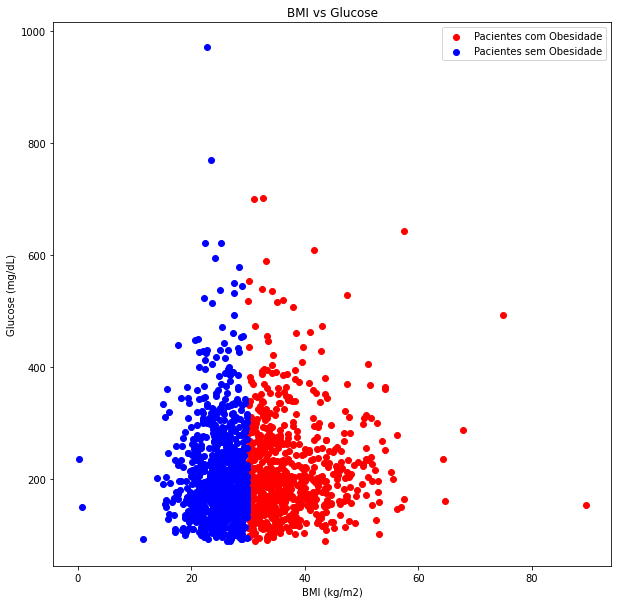

In [8]:
df = pd.read_csv('../data/interim/paired_glucose_insulin_ck_death.csv')

av_g = df.groupby(['subject_id'])['glucose_value'].mean().reset_index()
av_b = df.groupby(['subject_id'])['BMI (km/m2)'].mean().reset_index()

ob_b = av_b[av_b['BMI (km/m2)'] >= 30]
other_b = av_b[av_b['BMI (km/m2)'] < 30]

ob_g = av_g[av_g['subject_id'].isin(ob_b['subject_id'])]
other_g = av_g[av_g['subject_id'].isin(other_b['subject_id'])]

plt.figure(figsize=(10,10))
plt.scatter(ob_b['BMI (km/m2)'], ob_g['glucose_value'], color='red', label='Pacientes com Obesidade')
plt.scatter(other_b['BMI (km/m2)'], other_g['glucose_value'], color='blue', label='Pacientes sem Obesidade')
plt.xlabel('Mean BMI by Patient (kg/m2)')
plt.ylabel('Mean Glucose by Patient (mg/dL)')
plt.title('BMI vs Glucose')
plt.legend()
plt.show()